# Exercise 21 : Cohen-Sutherland Clipping
Using the Cohen-Sutherland algorithm, clip the segment (s 1 ; e 1 ) and (s 2 ; e 2 ). The clipping phase must be processed in order : BOTTOM , TOP , LEFT and RIGHT .

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

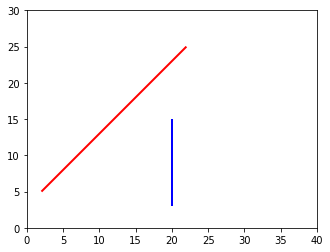

In [38]:
class Figure(object):
    def __init__(self):
        _, self.ax = plt.subplots()

    def draw(self):
        self.ax.axis((0, 40, 0, 30))
        self.ax.set_aspect(1)
        plt.show()
        
    def draw_polygon(self, points, linewidth=1, edgecolor='#000000'):
        polygon = Polygon(points, True, linewidth=linewidth, edgecolor=edgecolor, facecolor='#FFFFFF')
        self.ax.add_patch(polygon)
    
    def draw_point(self, p, color='red'):
        self.ax.plot(p[0], p[1], marker='o', markersize=3, color=color)

fig = Figure()

def draw_outline(fig):
    fig.draw_polygon([(10, 0), (10, 30)])
    fig.draw_polygon([(30, 0), (30, 30)])
    fig.draw_polygon([(0, 20), (40, 20)])
    fig.draw_polygon([(0, 10), (40, 10)])

s1 = (2, 5)
e1 = (22, 25)
s2 = (20, 15)
e2 = (20, 3)

fig.draw_polygon([s1, e1], linewidth=2, edgecolor='#FF0000')
fig.draw_polygon([s2, e2], linewidth=2, edgecolor='#0000FF')

fig.draw()